<a href="https://colab.research.google.com/github/Jaskirat1/AIT_LogisticRegression/blob/main/Heart_diseaseLogR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab as pl 
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


In [ ]:
df = pd.read_csv('framingham.csv')

In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.drop(['education'], inplace = True, axis = 1)

In [ ]:
df.rename(columns={'male':'Sex_male'}, inplace = True)

In [ ]:
df.dropna(axis=0, inplace=True)


In [ ]:
df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(3749, 15)

In [ ]:
df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

In [ ]:
df.columns

Index(['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

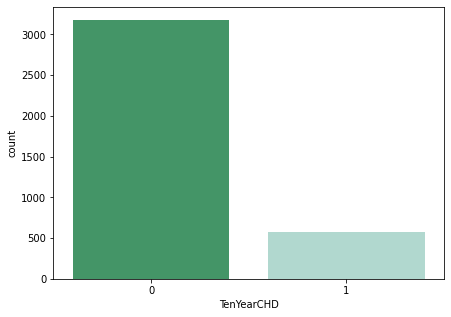

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD', data = df, palette='BuGn_r')
plt.show()

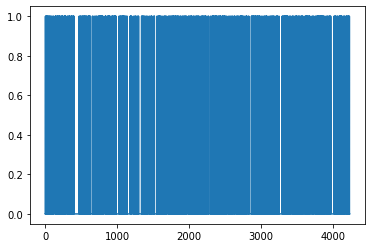

In [ ]:
laste = df['TenYearCHD'].plot()
plt.show(laste)

In [ ]:
X = np.asarray(df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
y = np.asarray(df['TenYearCHD'])

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)

In [ ]:
X_train.shape, y_train.shape


((2624, 6), (2624,))

In [ ]:
X_test.shape, y_test.shape

((1125, 6), (1125,))

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_test, y_predict)

In [ ]:
conf_matrx = pd.DataFrame(data = cm, columns =['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

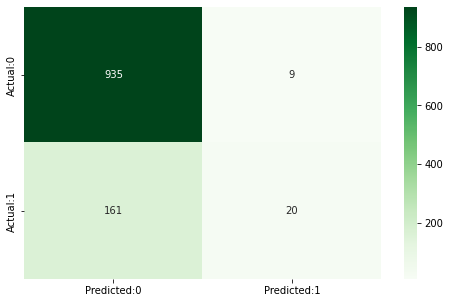

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrx, annot=True, fmt='d', cmap='Greens')
plt.show()

In [ ]:
plt.figure(figsize = (8, 5))
classification_report(y_test, y_predict)


'              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.92       944\n           1       0.69      0.11      0.19       181\n\n    accuracy                           0.85      1125\n   macro avg       0.77      0.55      0.55      1125\nweighted avg       0.83      0.85      0.80      1125\n'

<Figure size 576x360 with 0 Axes>